In [25]:
import operator

import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

Upload dataset

In [22]:
filenames = glob('data/full_who_dataset*.csv')
dataframes = [pd.read_csv(f) for f in filenames]
data = pd.concat(dataframes)

In [23]:
print('Total number of tweets:', len(data))
errors = data['tweet_lang']=='error'
data_errors = data[errors]
print('Undefiened number of tweets:', len(data_errors))

language_distribution = {}

for lang in data.tweet_lang:
    if lang not in language_distribution:
        language_distribution[lang] = 1
    else:
        language_distribution[lang] += 1

language_freq = sorted(language_distribution.items(), key=operator.itemgetter(1))

print('Language distribution', language_freq)

Total number of tweets: 6508227
Undefiened number of tweets: 75184
Language distribution [('he', 110), ('hu', 176), ('sk', 179), ('zh-tw', 226), ('bg', 287), ('lt', 319), ('sq', 502), ('pa', 885), ('uk', 1000), ('mk', 1077), ('no', 1236), ('zh-cn', 1269), ('cs', 1285), ('af', 1411), ('cy', 1425), ('bn', 1455), ('vi', 1578), ('lv', 1688), ('da', 1780), ('te', 2009), ('gu', 2374), ('ro', 2733), ('fi', 2733), ('mr', 2988), ('sl', 2998), ('ne', 3073), ('et', 3077), ('so', 3379), ('ko', 3533), ('ml', 3712), ('kn', 3745), ('fa', 3829), ('sv', 3984), ('hr', 5080), ('ru', 5819), ('el', 8303), ('tl', 8607), ('ur', 9249), ('sw', 9408), ('pl', 10100), ('nl', 12732), ('tr', 15293), ('ta', 28095), ('ar', 35769), ('de', 47207), ('ja', 48855), ('th', 61629), ('ca', 71133), ('error', 75184), ('pt', 77710), ('hi', 77732), ('id', 90235), ('it', 90235), ('fr', 386705), ('es', 1131755), ('en', 4139337)]


Draw a piechart with language distribution of tweets.

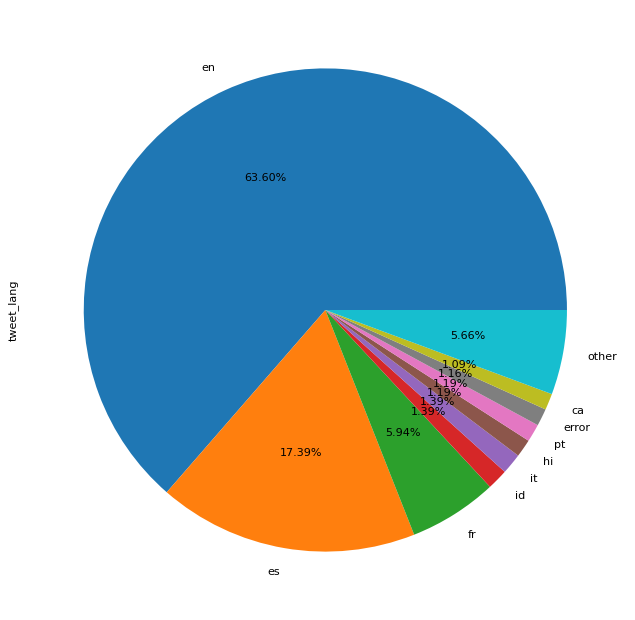

In [24]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

prob = data['tweet_lang'].value_counts(normalize=True)
threshold = 0.01
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='pie', autopct='%.2f%%', fontsize=10)
plt.xticks(rotation=0)
plt.show()